In [1]:
import detectron2
import cv2
from matplotlib import pyplot as plt
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
import random
from detectron2.utils.visualizer import Visualizer


** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
detectron2.data.datasets.register_coco_instances("wires", {}, "./mydata/coco.json", "./mydata/images")
wires_metadata = detectron2.data.MetadataCatalog.get("wires")
dataset_dicts = detectron2.data.DatasetCatalog.get("wires")

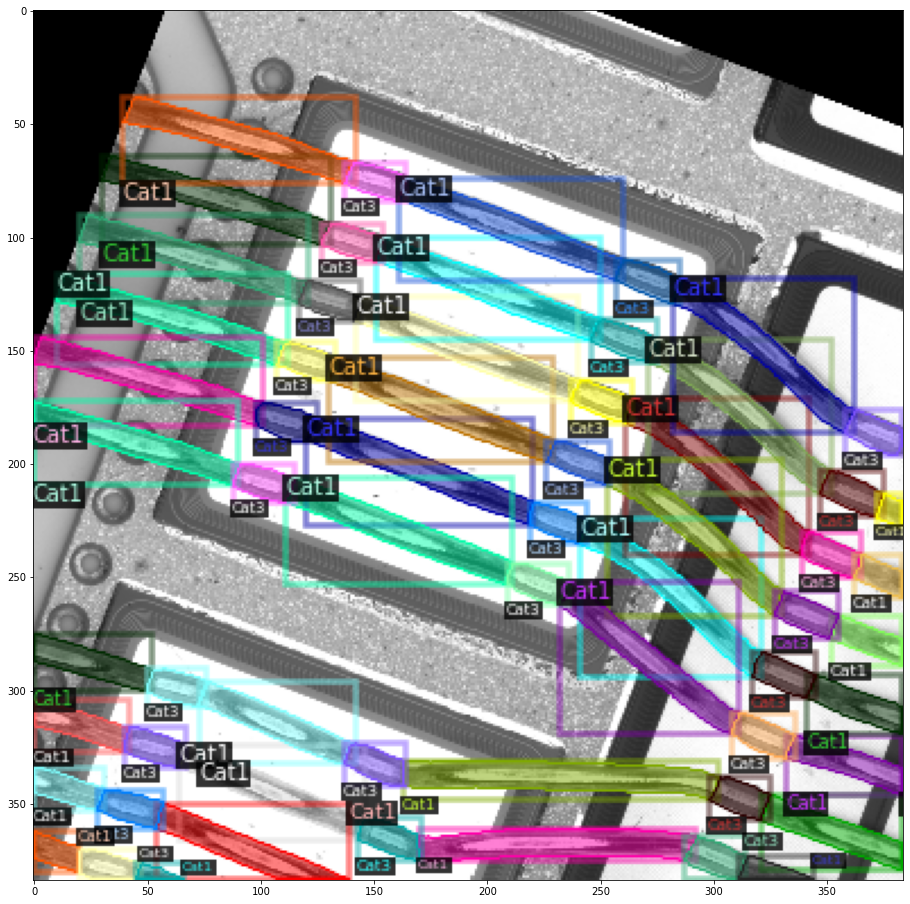

In [4]:
i = 20
d = dataset_dicts[i]
for x in random.sample(dataset_dicts, 1):
    d = x
img = cv2.imread(d["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=wires_metadata, scale=1)
vis = visualizer.draw_dataset_dict(d)
a = vis.get_image()[:, :, ::-1]
plt.figure(figsize=(16,16));
plt.imshow(a)

In [5]:

cfg = get_cfg()
cfg.merge_from_file(
    "./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_3x.yaml"
)

In [6]:
cfg.DATASETS.TRAIN = ("wires")
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 4
#cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
#cfg.MODEL.WEIGHTS = "output/saved1.pth"
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.02  # learning rate, default 0.02
cfg.SOLVER.MAX_ITER = (
    5300
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)
cfg.INPUT.MASK_FORMAT='bitmask' # use RLE instead of polygon
cfg.INPUT.MIN_SIZE_TRAIN = (80, 160, 240, 300, 360) # what is this?

In [7]:
cfg.INPUT

CfgNode({'MIN_SIZE_TRAIN': (80, 160, 240, 300, 360), 'MIN_SIZE_TRAIN_SAMPLING': 'choice', 'MAX_SIZE_TRAIN': 1333, 'MIN_SIZE_TEST': 800, 'MAX_SIZE_TEST': 1333, 'RANDOM_FLIP': 'horizontal', 'CROP': CfgNode({'ENABLED': False, 'TYPE': 'relative_range', 'SIZE': [0.9, 0.9]}), 'FORMAT': 'BGR', 'MASK_FORMAT': 'bitmask'})

In [8]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

[01/19 17:06:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

[01/19 17:06:56 d2.data.datasets.coco]: Loaded 324 images in COCO format from ./mydata/coco.json
[01/19 17:06:57 d2.data.build]: Removed 0 images with no usable annotations. 324 images left.
[01/19 17:06:57 d2.data.build]: Distribution of instances among all 3 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
|    Cat1    | 9470         |    Cat2    | 0            |    Cat3    | 7119         |
|            |              |            |              |            |              |
|   total    | 16589        |            |              |            |              |
[01/19 17:06:57 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(80, 160, 240, 300, 360), max_size=1333, sample_style='choice'), RandomFlip()]
[01/19 17:06:57 d2.data.build]: Using training sampler TrainingSampler
[01/19 17:06:57 d2.d

[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res2.2.conv2.norm.bias                      loaded from res2_2_branch2b_bn_beta           of shape (64,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res2.2.conv2.norm.running_mean              loaded from res2_2_branch2b_bn_running_mean   of shape (64,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res2.2.conv2.norm.running_var               loaded from res2_2_branch2b_bn_running_var    of shape (64,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res2.2.conv2.norm.weight                    loaded from res2_2_branch2b_bn_gamma          of shape (64,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res2.2.conv2.weight                         loaded from res2_2_branch2b_w                 of shape (64, 64, 3, 3)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res2.2.conv3.norm.bias                      loaded from res2_2_branch2c_bn_beta           of shape (256,)
[01/19 17:06

[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res3.2.conv1.norm.running_var               loaded from res3_2_branch2a_bn_running_var    of shape (128,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res3.2.conv1.norm.weight                    loaded from res3_2_branch2a_bn_gamma          of shape (128,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res3.2.conv1.weight                         loaded from res3_2_branch2a_w                 of shape (128, 512, 1, 1)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res3.2.conv2.norm.bias                      loaded from res3_2_branch2b_bn_beta           of shape (128,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res3.2.conv2.norm.running_mean              loaded from res3_2_branch2b_bn_running_mean   of shape (128,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res3.2.conv2.norm.running_var               loaded from res3_2_branch2b_bn_running_var    of shape (128,)
[01/19

[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.0.shortcut.weight                      loaded from res4_0_branch1_w                  of shape (1024, 512, 1, 1)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.1.conv1.norm.bias                      loaded from res4_1_branch2a_bn_beta           of shape (256,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.1.conv1.norm.running_mean              loaded from res4_1_branch2a_bn_running_mean   of shape (256,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.1.conv1.norm.running_var               loaded from res4_1_branch2a_bn_running_var    of shape (256,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.1.conv1.norm.weight                    loaded from res4_1_branch2a_bn_gamma          of shape (256,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.1.conv1.weight                         loaded from res4_1_branch2a_w                 of shape (256, 1024, 

[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.4.conv1.norm.running_mean              loaded from res4_4_branch2a_bn_running_mean   of shape (256,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.4.conv1.norm.running_var               loaded from res4_4_branch2a_bn_running_var    of shape (256,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.4.conv1.norm.weight                    loaded from res4_4_branch2a_bn_gamma          of shape (256,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.4.conv1.weight                         loaded from res4_4_branch2a_w                 of shape (256, 1024, 1, 1)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.4.conv2.norm.bias                      loaded from res4_4_branch2b_bn_beta           of shape (256,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res4.4.conv2.norm.running_mean              loaded from res4_4_branch2b_bn_running_mean   of shape (256,)
[01/1

[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res5.0.shortcut.norm.weight                 loaded from res5_0_branch1_bn_gamma           of shape (2048,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res5.0.shortcut.weight                      loaded from res5_0_branch1_w                  of shape (2048, 1024, 1, 1)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res5.1.conv1.norm.bias                      loaded from res5_1_branch2a_bn_beta           of shape (512,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res5.1.conv1.norm.running_mean              loaded from res5_1_branch2a_bn_running_mean   of shape (512,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res5.1.conv1.norm.running_var               loaded from res5_1_branch2a_bn_running_var    of shape (512,)
[01/19 17:06:57 d2.checkpoint.c2_model_loading]: backbone.res5.1.conv1.norm.weight                    loaded from res5_1_branch2a_bn_gamma          of shape (512,)
[01

In [9]:
#trainer.optimizer

In [ ]:
trainer.train()

[01/19 17:06:58 d2.engine.train_loop]: Starting training from iteration 0
[01/19 17:07:06 d2.utils.events]:  eta: 0:18:43  iter: 19  total_loss: 3.389  loss_cls: 0.9212  loss_box_reg: 0.4184  loss_mask: 0.6756  loss_rpn_cls: 0.6553  loss_rpn_loc: 0.6678  time: 0.2111  data_time: 0.1332  lr: 0.00039962  max_mem: 3644M
[01/19 17:07:10 d2.utils.events]:  eta: 0:18:39  iter: 39  total_loss: 2.549  loss_cls: 0.6841  loss_box_reg: 0.4203  loss_mask: 0.6544  loss_rpn_cls: 0.4291  loss_rpn_loc: 0.367  time: 0.2112  data_time: 0.0021  lr: 0.00079922  max_mem: 3644M
[01/19 17:07:14 d2.utils.events]:  eta: 0:18:33  iter: 59  total_loss: 2.374  loss_cls: 0.6037  loss_box_reg: 0.5245  loss_mask: 0.6375  loss_rpn_cls: 0.2513  loss_rpn_loc: 0.317  time: 0.2108  data_time: 0.0023  lr: 0.0011988  max_mem: 3644M
[01/19 17:07:19 d2.utils.events]:  eta: 0:18:33  iter: 79  total_loss: 2.31  loss_cls: 0.5588  loss_box_reg: 0.5637  loss_mask: 0.6391  loss_rpn_cls: 0.1982  loss_rpn_loc: 0.3101  time: 0.2113  

[01/19 17:09:27 d2.utils.events]:  eta: 0:16:31  iter: 679  total_loss: 1.664  loss_cls: 0.3019  loss_box_reg: 0.5968  loss_mask: 0.51  loss_rpn_cls: 0.07355  loss_rpn_loc: 0.2021  time: 0.2118  data_time: 0.0023  lr: 0.013586  max_mem: 3644M
[01/19 17:09:31 d2.utils.events]:  eta: 0:16:27  iter: 699  total_loss: 1.621  loss_cls: 0.2927  loss_box_reg: 0.5722  loss_mask: 0.4915  loss_rpn_cls: 0.07558  loss_rpn_loc: 0.1894  time: 0.2119  data_time: 0.0022  lr: 0.013986  max_mem: 3644M
[01/19 17:09:35 d2.utils.events]:  eta: 0:16:23  iter: 719  total_loss: 1.679  loss_cls: 0.2785  loss_box_reg: 0.6105  loss_mask: 0.4998  loss_rpn_cls: 0.06981  loss_rpn_loc: 0.2125  time: 0.2119  data_time: 0.0024  lr: 0.014386  max_mem: 3644M
[01/19 17:09:40 d2.utils.events]:  eta: 0:16:19  iter: 739  total_loss: 1.569  loss_cls: 0.2693  loss_box_reg: 0.5119  loss_mask: 0.5066  loss_rpn_cls: 0.06343  loss_rpn_loc: 0.185  time: 0.2120  data_time: 0.0023  lr: 0.014785  max_mem: 3644M
[01/19 17:09:44 d2.util

[01/19 17:11:48 d2.utils.events]:  eta: 0:14:11  iter: 1339  total_loss: 1.345  loss_cls: 0.2014  loss_box_reg: 0.533  loss_mask: 0.3917  loss_rpn_cls: 0.05064  loss_rpn_loc: 0.1678  time: 0.2122  data_time: 0.0021  lr: 0.02  max_mem: 3645M
[01/19 17:11:52 d2.utils.events]:  eta: 0:14:07  iter: 1359  total_loss: 1.339  loss_cls: 0.1987  loss_box_reg: 0.5173  loss_mask: 0.4106  loss_rpn_cls: 0.05827  loss_rpn_loc: 0.1729  time: 0.2121  data_time: 0.0022  lr: 0.02  max_mem: 3645M
[01/19 17:11:56 d2.utils.events]:  eta: 0:14:02  iter: 1379  total_loss: 1.338  loss_cls: 0.1901  loss_box_reg: 0.4981  loss_mask: 0.4478  loss_rpn_cls: 0.05413  loss_rpn_loc: 0.1741  time: 0.2119  data_time: 0.0018  lr: 0.02  max_mem: 3645M
[01/19 17:12:00 d2.utils.events]:  eta: 0:13:57  iter: 1399  total_loss: 1.317  loss_cls: 0.2019  loss_box_reg: 0.5193  loss_mask: 0.3897  loss_rpn_cls: 0.05457  loss_rpn_loc: 0.1501  time: 0.2119  data_time: 0.0020  lr: 0.02  max_mem: 3645M


In [16]:
#cfg = get_cfg()
#cfg.merge_from_file(
#    "./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
#)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "save/model_hungar.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8   # set the testing threshold for this model
cfg.DATASETS.TEST = ("wires", )
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)

predictor = detectron2.engine.defaults.DefaultPredictor(cfg)

0.4677441120147705,0.15159320831298828


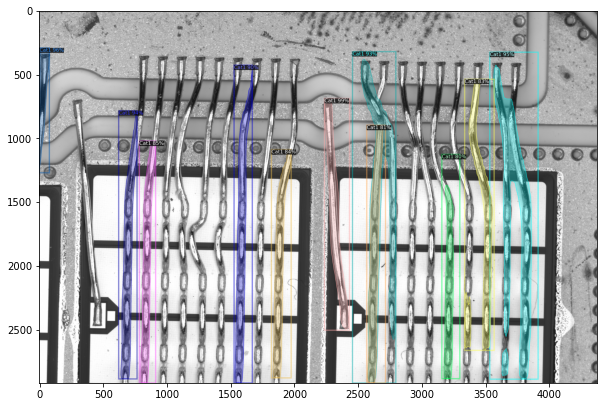

In [28]:
from detectron2.utils.visualizer import ColorMode
import time
plt.figure(figsize=(10,
                    10))
for d in random.sample(dataset_dicts, 1):
#    im = cv2.imread(d["file_name"])
    im = cv2.imread('myTest/1.png')
    t0 = time.time()
    outputs, tmp = predictor(im)
    t1 = time.time()
    v = Visualizer(im[:, :, ::-1],
                   metadata=wires_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    t2 = time.time()
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    a = v.get_image()[:, :, ::-1]
    plt.imshow(a)
    print(f'{t2-t1},{t1-t0}')